# Queue Estimation on LLMs

In [75]:
import pandas as pd
from matplotlib import pyplot as plt
import re

In [76]:
def title_from_exp_str(s):
    # Replace underscores with spaces
    s = s.replace('_', ' ')
    
    # Insert '=' between letters and numbers
    s = re.sub(r'([a-zA-Z])(\d+)', r'\1=\2', s)
    
    # Add commas to large numbers (1,000 and above)
    s = re.sub(r'(\d{1,3})(?=(\d{3})+(?!\d))', r'\1,', s)
    
    return s


In [77]:
data_dir = "data_24Nov"

## MB=1 C=1 w=800_000 t=100 n=60 d=5

In [78]:
MB=1
C=1
w=800_000
t=100
n=60
d=5

In [79]:
lam = float(C*1_000_000/w)

In [80]:
exp_str = f'MB_{MB}_C{C}_w{w}_t{t}_n{n}_d{d}'

In [81]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fname = f'{data_dir}/round_trips_{exp_str}.csv'

In [82]:
print(f'Reading from {q_fname} and {r_fname}')

Reading from data_24Nov/queue_size_MB_1_C1_w800000_t100_n60_d5.csv and data_24Nov/round_trips_MB_1_C1_w800000_t100_n60_d5.csv


In [83]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_df = pd.read_csv(r_fname, names=['i', 'start', 'end', 'rtt', 'ok'])

In [84]:
r_df.head()

,i,start,end,rtt,ok
0,0,32163.913584,32165.018631,1.105046,0
1,1,32164.052072,32166.114078,2.062006,0
2,2,32165.776562,32167.208399,1.431838,0
3,3,32170.052398,32171.149151,1.096753,0
4,4,32170.156814,32172.244662,2.087849,0


In [85]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [86]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [87]:
mean_in_service = q_df['in_service'].mean()

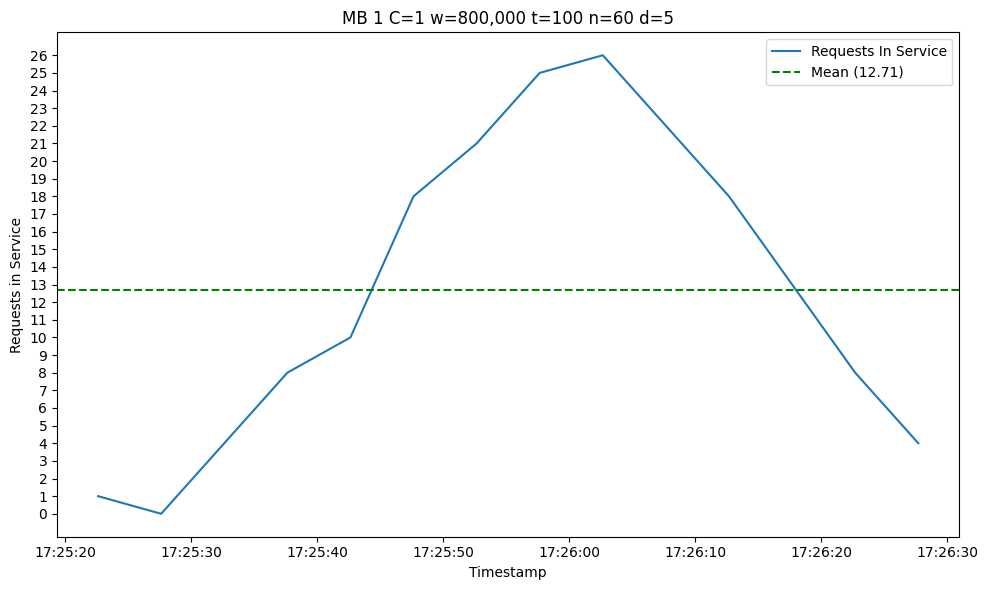

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(int(q_df['in_service'].min()), int(q_df['in_service'].max()) + 1))
plt.legend()
plt.tight_layout()

In [89]:
mean_request_rate = q_df['request_rate'].mean()

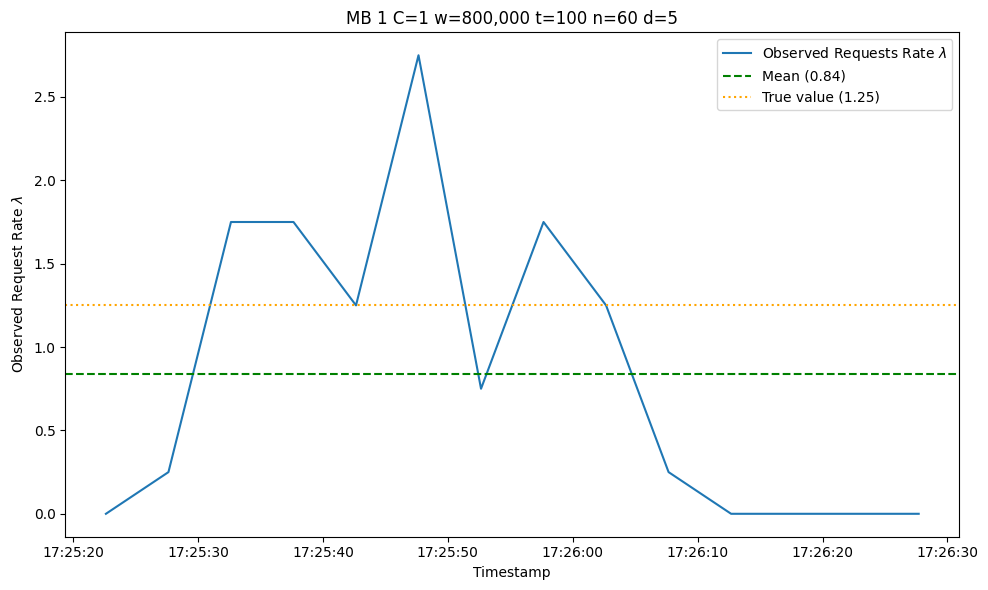

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [91]:
mean_mu_hat = mu_hat.mean()

In [92]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

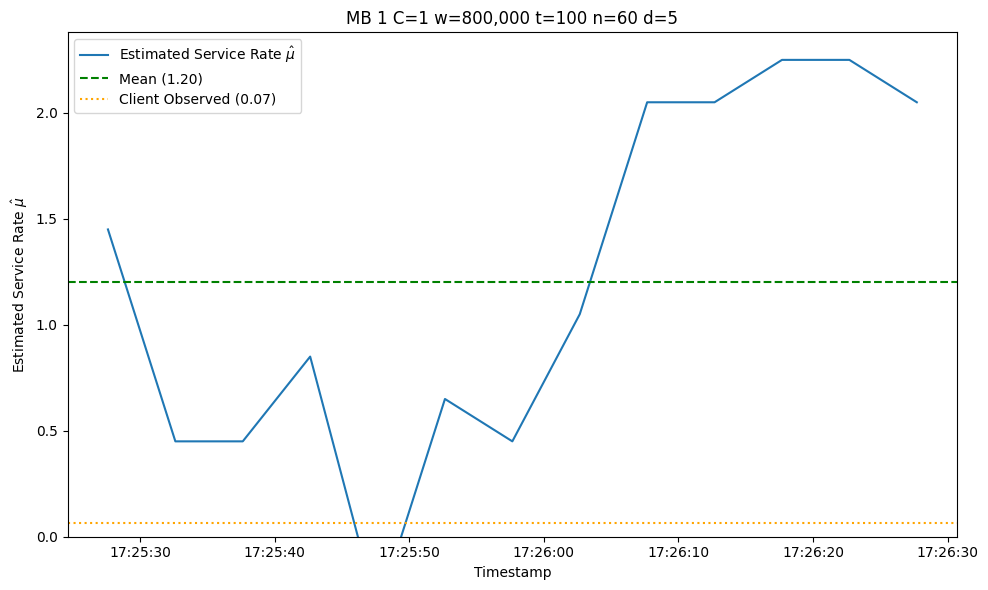

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [94]:
starts = r_df.start.sort_values()
ends = r_df.end.sort_values()

In [99]:
cq = []
for t in starts:
    cq.append([t, 1])
for t in ends:
    cq.append([t, -1])
cq = sorted(cq, key=lambda r: r[0])

In [100]:
cq_df = pd.DataFrame(data=cq, columns=['time', 'd'])

In [103]:
cq_df['q'] = cq_df['d'].cumsum()
mean_cq = cq_df['q'].mean()

Text(0.5, 1.0, 'MB 1 C=1 w=800,000 t=100 n=60 d=5')

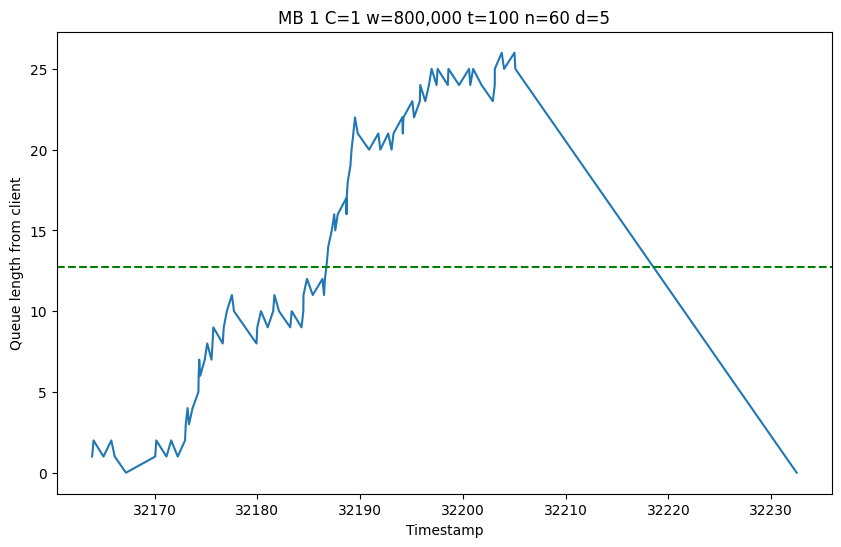

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(cq_df['time'], cq_df['q'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_cq:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Queue length from client')
plt.title(title_from_exp_str(exp_str))

# MB=1 C=1 w=200_000 t=100 n=240 d=5

In [20]:
MB=1
C=1
w=200_000
t=100
n=240
d=5

In [21]:
lam = float(C*1_000_000/w)

In [22]:
exp_str = f'MB_{MB}_C{C}_w{w}_t{t}_n{n}_d{d}'

In [23]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fname = f'{data_dir}/round_trips_{exp_str}.csv'

In [24]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_df = pd.read_csv(r_fname, names=['i', 'start', 'end', 'rtt', 'ok'])

In [25]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [26]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [27]:
mean_in_service = q_df['in_service'].mean()

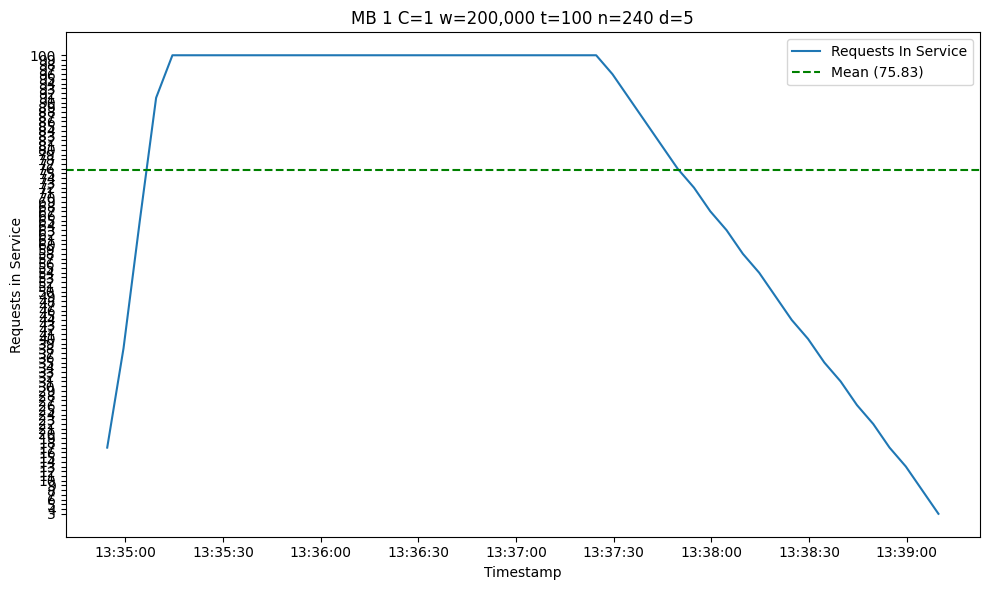

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(int(q_df['in_service'].min()), int(q_df['in_service'].max()) + 1))
plt.legend()
plt.tight_layout()

In [29]:
mean_request_rate = q_df['request_rate'].mean()

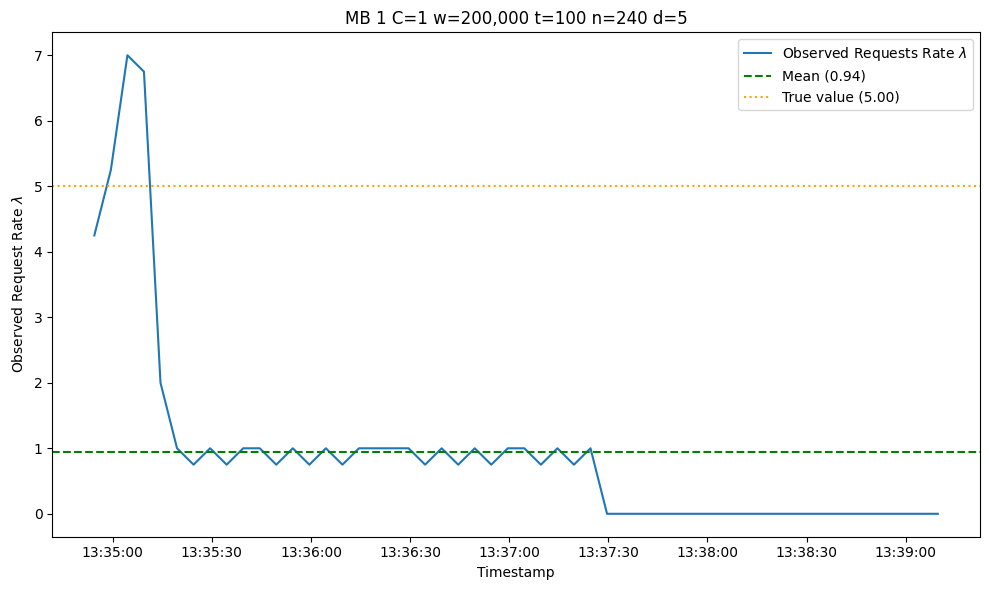

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [31]:
mean_mu_hat = mu_hat.mean()

In [32]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

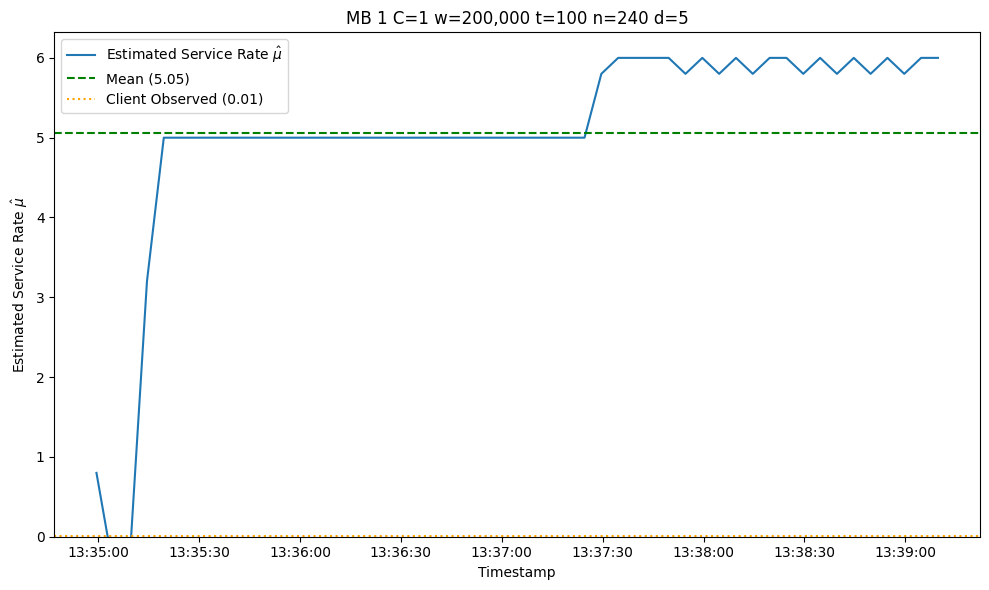

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

# MB=1 C=2 w=200_000 t=100 n=240 d=5

In [39]:
MB=1
C=2
w=200_000
t=100
n=240
d=5

In [40]:
lam = float(C*1_000_000/w)

In [41]:
exp_str = f'MB_{MB}_C{C}_w{w}_t{t}_n{n}_d{d}'

In [59]:
q_fname = f'{data_dir}/queue_size_{exp_str}.csv'
r_fnames = [f'{data_dir}/round_trips_{exp_str}_{i}.csv' for i in range(1, C+1)]

In [60]:
q_df = pd.read_csv(q_fname, parse_dates=['timestamp'])
q_df.index = q_df.timestamp
r_dfs = [pd.read_csv(r_fname, names=['i', 'start', 'end', 'rtt', 'ok']) for r_fname in r_fnames]
r_df = pd.concat(r_dfs, ignore_index=True)

In [61]:
q_df['in_service'] = q_df.queue_size + q_df.batch_current_size

In [62]:
mu_hat = -1/d * q_df['in_service'].diff() + lam
mu_hat = mu_hat.dropna()

In [63]:
mean_in_service = q_df['in_service'].mean()

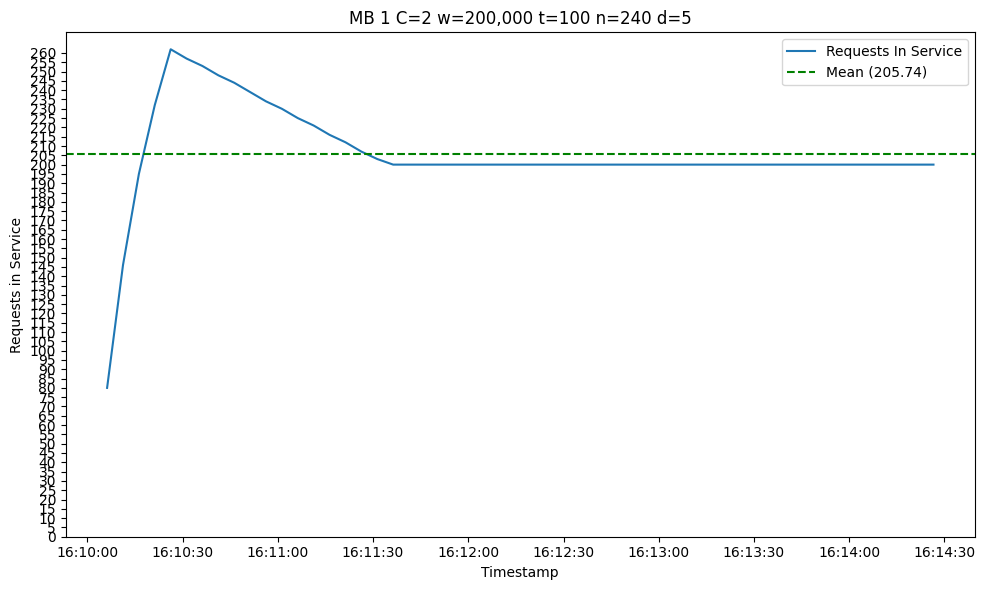

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['in_service'], label='Requests In Service')
plt.axhline(y=mean_in_service, color='green', linestyle='--', label=f'Mean ({mean_in_service:.2f})')

plt.xlabel('Timestamp')
plt.ylabel('Requests in Service')
plt.title(title_from_exp_str(exp_str))
plt.yticks(range(0, int(q_df['in_service'].max()) + 1, 5))
plt.legend()
plt.tight_layout()

In [65]:
mean_request_rate = q_df['request_rate'].mean()

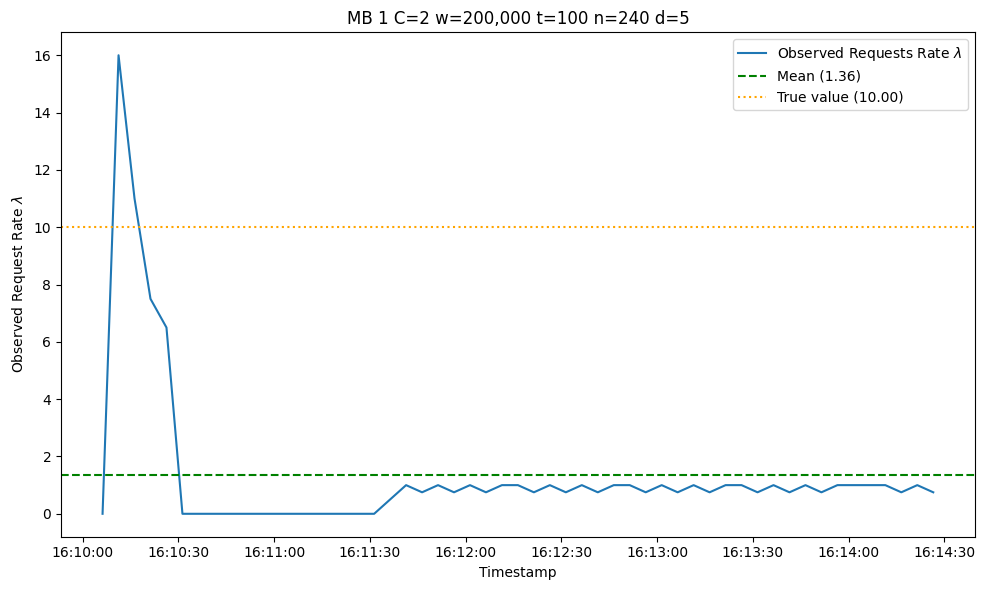

In [66]:
plt.figure(figsize=(10, 6))
plt.plot(q_df.index, q_df['request_rate'], label=r'Observed Requests Rate $\lambda$')
plt.axhline(y=mean_request_rate, color='green', linestyle='--', label=f'Mean ({mean_request_rate:.2f})')
plt.axhline(y=lam, color='orange', linestyle=':', label=f'True value ({lam:.2f})')

plt.xlabel('Timestamp')
plt.ylabel(r'Observed Request Rate $\lambda$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [67]:
mean_mu_hat = mu_hat.mean()

In [68]:
rtt_mean = r_df['rtt'].mean()
per_req_mean = 1 / rtt_mean

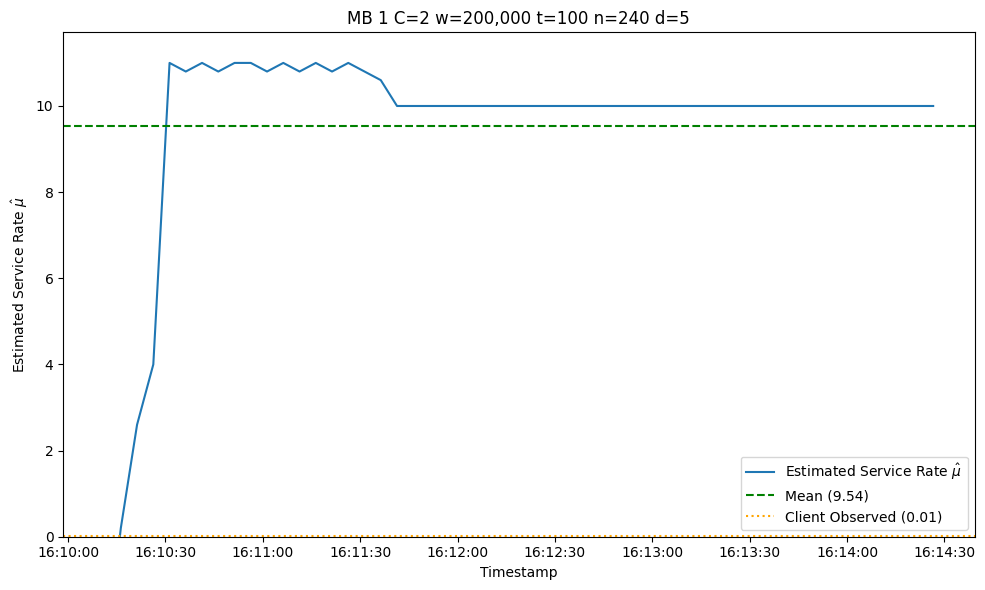

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(mu_hat, label=r'Estimated Service Rate $\hat{\mu}$')
plt.axhline(y=mean_mu_hat, color='green', linestyle='--', label=f'Mean ({mean_mu_hat:.2f})')
plt.axhline(y=per_req_mean, color='orange', linestyle=':', label=f'Client Observed ({per_req_mean:.2f})')
plt.ylim((0,None))
plt.xlabel('Timestamp')
plt.ylabel(r'Estimated Service Rate $\hat{\mu}$')
plt.title(title_from_exp_str(exp_str))
plt.legend()
plt.tight_layout()

In [70]:
r_df.head()

,i,start,end,rtt,ok
0,0,27404.654084,27406.849368,2.195285,0
1,1,27404.760729,27409.038276,4.277546,0
2,2,27404.891360,27411.227024,6.335664,0
3,3,27404.974945,27413.415675,8.440730,0
4,4,27405.111589,27414.509258,9.397670,0


In [71]:
starts = r_df.start.sort_values()
ends = r_df.end.sort_values()